## 0. Set up preparation

### Auto-Reload

In [1]:
%load_ext autoreload
%autoreload 2
# 파이썬 코드를 실행하기 전에 항상 모든 모듈을 Reload

### Add a module path

In [2]:
import os
import sys

In [ ]:
# This command returns the absolute path of the folder where Jupyter is running. If you want to use a different path instead of the Jupyter folder, please modify it.
jupyter_run_dir = os.getcwd()
print(f'The current active folder is "{jupyter_run_dir}".\n')

# module path
module_dir = jupyter_run_dir + '/Image-to-NPZ_dataset-with-DA'

sys.path.append(module_dir)
print(sys.path[-1])

The current active folder is "/mnt/4d055040/lab".

/mnt/4d055040/lab/Splitting-data


### Maintain the experiment under the same conditions.

In [4]:
import random
import numpy as np

def seed(seed = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

seed()

## 1. DA

### Loading an npz dataset.
> Loading the npz file saved in `1-make_a_dataset.ipynb` or `1-make_a_dataset_for_k-fold.ipynb`.

In [5]:
from utils.utils import load_npz_dataset

In [14]:
npz_path = '/mnt/797cf4e7-1dc1-4e40-ac32-d4f55c462ff4/aima/dataset/TNBC/npz-split/train0.6val0.2test0.2.npz' #'/mnt/7977asdasf/npz/train0.6val0.2test0.2.npz'
class_names, x_train, x_valid, x_test, y_train, y_valid, y_test = load_npz_dataset(npz_path)
class_names

array(['TNBC_baseline', 'Normal'], dtype='<U13')

### Calculating the number of datasets after performing data augmentation and combining them.

In [21]:
print(f'All count : {y_train.shape}')

data_count = [len(np.where(np.array(y_train) == i)[0]) for i in range(len(class_names))]
ori0, ori1 = data_count

print('=========================================')
for i, j in zip([0,1,1,2], [1,3,4,5]):
    one, two = ori0*(i+1), ori1*(j+1)
    print(f'{class_names[0]} x{i} & {class_names[1]} x{j} : {one}, {two} -> sum : {one + two}')
print()

All count : (531,)
TNBC_baseline x0 & Normal x1 : 365, 332 -> sum : 697
TNBC_baseline x1 & Normal x3 : 730, 664 -> sum : 1394
TNBC_baseline x1 & Normal x4 : 730, 830 -> sum : 1560
TNBC_baseline x2 & Normal x5 : 1095, 996 -> sum : 2091



### Performing data augmentation for brightness adjustment.

In [24]:
from utils.data_augmentation import bright_DA_run

Image shape:  (800, 400, 3)


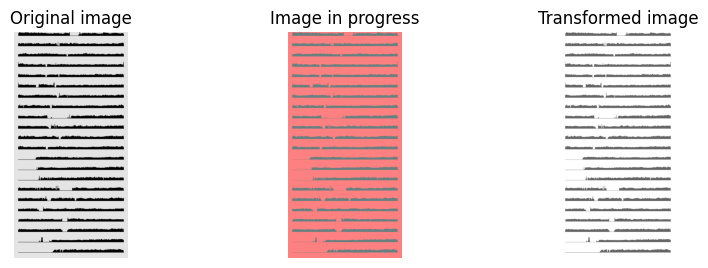

After shape : ((697, 800, 400, 3), (697,))
save...



In [31]:
bright_DA_run([npz_path], [0, 1], [0, 1], save=False)